# **An introductory procedure for pangenome analysis**

Created by Juan P. Cardenas (`juan.pablo.cardenas@gmail.com`)

-------------

## **Preparing software, example data and predict ORFs**




In [1]:
### Starting the Conda system in Colab
!pip install -q condacolab
!pip install PyDrive -q
import condacolab
condacolab.install()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


```
Pause here! first let's make the condacolab system install
```

In [1]:
#### Activating conda in colab
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
### Installing our tools
!conda install -c bioconda prodigal orthofinder -q -y

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - orthofinder
    - prodigal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.14            |       hb9d3cd8_0         553 KB  conda-forge
    aria2-1.37.0               |       hbc8128a_2         1.6 MB  conda-forge
    aster-1.23                 |       h9948957_0         1.5 MB  bioconda
    attr-2.5.2                 |       h39aace5_0          66 KB  conda-forge
    biopython-1.85             |  py311h49ec1c0_2         3.3 MB  conda-forge
    blast-2.16.0               |       h66d330f_4       141.4 MB  bioconda
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    cairo-1.18.4               |       h3394656_0         955 KB  conda-forge
    certifi-2025.8.3     

In [3]:
### Downloading the file with our example genomes
!wget -nc https://github.com/jpca21/pangenome_2025_scripts/raw/refs/heads/main/example_genomes_fasta.tar.gz


### Create a folder for the genomes and moving the compressed file there
!mkdir example_genomes
!mv example_genomes_fasta.tar.gz example_genomes
!pwd

--2025-09-04 02:57:11--  https://github.com/jpca21/pangenome_2025_scripts/raw/refs/heads/main/example_genomes_fasta.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/example_genomes_fasta.tar.gz [following]
--2025-09-04 02:57:11--  https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/example_genomes_fasta.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10079966 (9.6M) [application/octet-stream]
Saving to: ‘example_genomes_fasta.tar.gz’

example_genomes_fas 100%[===================>]   9.61M  62.9MB/s    in 0.2s 

In [4]:
### Changing the directory and uncompressing the file
%cd example_genomes
!tar -xvzf example_genomes_fasta.tar.gz

/content/example_genomes
GCA_000155395.1_ASM15539v1_genomic.fna
GCA_000164965.1_ASM16496v1_genomic.fna
GCA_000165905.1_ASM16590v1_genomic.fna
GCA_000265095.1_ASM26509v1_genomic.fna
GCA_000273525.1_PB_Bifi_bifi_NCIMB_41171_V1_genomic.fna
GCA_000466525.1_ASM46652v1_genomic.fna
GCA_000741085.1_Bifbif_genomic.fna
GCA_001020245.1_Bbif04v4_genomic.fna
GCA_001020255.1_Bbif02v4_genomic.fna
GCA_001020275.1_Bbif07v4_genomic.fna
GCA_001020325.1_Bbif10v4_genomic.fna
GCA_001020335.1_Bbif08v4_genomic.fna
GCA_001020355.1_Bbif01v4_genomic.fna
GCA_001020375.1_Bbif03v4_genomic.fna
GCA_001020405.1_Bbif06v4_genomic.fna


In [5]:
### Executing Prodigal here for every file
!for aa in *.fna; \
  do  cc=`echo ${aa}| sed "s/.fna$//" ` ; \
  prodigal -i $aa -q -c -m -a ${cc}_out.faa -d ${cc}_out.ffn -o ${cc}_out.gbk ; done

In [6]:
### See the content of the Directory
!ls -hlt

total 92M
-rw-r--r-- 1 root root 839K Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.faa
-rw-r--r-- 1 root root 2.1M Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.ffn
-rw-r--r-- 1 root root 427K Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.gbk
-rw-r--r-- 1 root root 860K Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.faa
-rw-r--r-- 1 root root 2.1M Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.ffn
-rw-r--r-- 1 root root 437K Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.gbk
-rw-r--r-- 1 root root 922K Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.faa
-rw-r--r-- 1 root root 2.3M Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.ffn
-rw-r--r-- 1 root root 472K Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.gbk
-rw-r--r-- 1 root root 873K Sep  4 02:58 GCA_001020335.1_Bbif08v4_genomic_out.faa
-rw-r--r-- 1 root root 2.1M Sep  4 02:58 GCA_001020335.1_Bbif08v4_genomic_out.ffn
-rw-r--r-- 1 root root 454K Sep  4 02:58 GCA_001020335.1_Bbif08v4_genomic_out.gbk
-rw-r-

In [7]:
### Making some statistics
!echo -e "Genome\t#Contigs\t#Total_bases\t#Total_CDS"
!for aa in *.fna; \
  do  cc=`echo ${aa}| sed "s/.fna$//" | sed "s/_genomic$//" ` ; \
   cont=`cat ${aa} | grep "^>" | wc -l ` ; \
   bps=`cat ${aa} | grep -v "^>" | wc -c ` ; \
   cds=`cat ${cc}_genomic_out.faa | grep "^>" | wc -l ` ; \
   echo -e "${cc}\t${cont}\t${bps}\t${cds}" ; done


Genome	#Contigs	#Total_bases	#Total_CDS
GCA_000155395.1_ASM15539v1	9	2230232	1807
GCA_000164965.1_ASM16496v1	1	2214219	1787
GCA_000165905.1_ASM16590v1	1	2242340	1830
GCA_000265095.1_ASM26509v1	1	2251460	1792
GCA_000273525.1_PB_Bifi_bifi_NCIMB_41171_V1	1	2244100	1825
GCA_000466525.1_ASM46652v1	27	2228781	1834
GCA_000741085.1_Bifbif	2	2236075	1823
GCA_001020245.1_Bbif04v4	10	2250899	1813
GCA_001020255.1_Bbif02v4	8	2219216	1811
GCA_001020275.1_Bbif07v4	6	2250287	1814
GCA_001020325.1_Bbif10v4	15	2203241	1800
GCA_001020335.1_Bbif08v4	17	2266523	1884
GCA_001020355.1_Bbif01v4	9	2390482	1977
GCA_001020375.1_Bbif03v4	2	2231897	1832
GCA_001020405.1_Bbif06v4	17	2200162	1777


In [8]:
### Download a code to make the internal relabelling of each ORF in the fasta of each ORFeome
!wget -nc https://github.com/jpca21/pangenome_2025_scripts/raw/refs/heads/main/relabeller_ORF_fasta.py

### Use this instruction to create relabelled files
!for aa in *_out.faa ; \
 do NEW_LTAG=$(cat /dev/urandom | tr -dc 'a-zA-Z0-9' | fold -w 6 | head -n 1) ; \
 bb=`echo ${aa}| sed "s/.faa$/.ffn/" ` ; \
 cc=`echo ${aa}| sed "s/.faa$//" ` ; \
 python relabeller_ORF_fasta.py -i ${aa} -o ${cc}_NEO.faa -p $NEW_LTAG ; \
 python relabeller_ORF_fasta.py -i ${bb} -o ${cc}_NEO.ffn -p $NEW_LTAG ; \
  echo "locus_tag = $NEW_LTAG" ; echo "" ; done

--2025-09-04 02:58:59--  https://github.com/jpca21/pangenome_2025_scripts/raw/refs/heads/main/relabeller_ORF_fasta.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/relabeller_ORF_fasta.py [following]
--2025-09-04 02:58:59--  https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/relabeller_ORF_fasta.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1236 (1.2K) [text/plain]
Saving to: ‘relabeller_ORF_fasta.py’

relabeller_ORF_fast 100%[===================>]   1.21K  --.-KB/s    in 0s      

2025-09-04 02:58:59 (73.7 MB/s) -

In [9]:
### See the content of the folder again
!ls -thl

total 130M
-rw-r--r-- 1 root root 1.9M Sep  4 02:59 GCA_001020405.1_Bbif06v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 639K Sep  4 02:59 GCA_001020405.1_Bbif06v4_genomic_out_NEO.faa
-rw-r--r-- 1 root root 1.9M Sep  4 02:59 GCA_001020375.1_Bbif03v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 649K Sep  4 02:59 GCA_001020375.1_Bbif03v4_genomic_out_NEO.faa
-rw-r--r-- 1 root root 2.0M Sep  4 02:59 GCA_001020355.1_Bbif01v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 699K Sep  4 02:59 GCA_001020355.1_Bbif01v4_genomic_out_NEO.faa
-rw-r--r-- 1 root root 1.9M Sep  4 02:59 GCA_001020335.1_Bbif08v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 661K Sep  4 02:59 GCA_001020335.1_Bbif08v4_genomic_out_NEO.faa
-rw-r--r-- 1 root root 1.9M Sep  4 02:59 GCA_001020325.1_Bbif10v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 641K Sep  4 02:59 GCA_001020325.1_Bbif10v4_genomic_out_NEO.faa
-rw-r--r-- 1 root root 1.9M Sep  4 02:59 GCA_001020275.1_Bbif07v4_genomic_out_NEO.ffn
-rw-r--r-- 1 root root 655K Sep  4 02:59 GC

In [10]:
### Creating a new folder and storing faa and ffn files there
!mkdir new_faa
!mkdir new_ffn
!mv *_NEO.faa new_faa
!mv *_NEO.ffn new_ffn

In [11]:
### Just checking
!ls -tlh

total 92M
drwxr-xr-x 2 root root 4.0K Sep  4 02:59 new_ffn
drwxr-xr-x 2 root root 4.0K Sep  4 02:59 new_faa
-rw-r--r-- 1 root root 1.3K Sep  4 02:58 relabeller_ORF_fasta.py
-rw-r--r-- 1 root root 839K Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.faa
-rw-r--r-- 1 root root 2.1M Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.ffn
-rw-r--r-- 1 root root 427K Sep  4 02:58 GCA_001020405.1_Bbif06v4_genomic_out.gbk
-rw-r--r-- 1 root root 860K Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.faa
-rw-r--r-- 1 root root 2.1M Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.ffn
-rw-r--r-- 1 root root 437K Sep  4 02:58 GCA_001020375.1_Bbif03v4_genomic_out.gbk
-rw-r--r-- 1 root root 922K Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.faa
-rw-r--r-- 1 root root 2.3M Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.ffn
-rw-r--r-- 1 root root 472K Sep  4 02:58 GCA_001020355.1_Bbif01v4_genomic_out.gbk
-rw-r--r-- 1 root root 873K Sep  4 02:58 GCA_001020335.1_Bbif08v4_genomic_out.faa
-rw-r--

In [12]:
### Lets move the folders into the parent directory
!mv new_faa /content/
!mv new_ffn /content/

In [13]:
### Finally changing to the parent directory
%cd ..

/content


In [14]:
### Checking again! (sorry, it is necessary!)
!ls -thl

total 48K
drwxr-xr-x 2 root root  12K Sep  4 02:59 example_genomes
drwxr-xr-x 2 root root 4.0K Sep  4 02:59 new_ffn
drwxr-xr-x 2 root root 4.0K Sep  4 02:59 new_faa
-rw-r--r-- 1 root root  21K Sep  4 02:54 condacolab_install.log
drwxr-xr-x 1 root root 4.0K Sep  2 13:40 sample_data


----
## **Executing `Orthofinder`**


In [15]:
!orthofinder -h


SIMPLE USAGE:
 Run full OrthoFinder analysis on FASTA format proteomes in <dir>
   orthofinder [options] -f <dir>

 To assign species from <dir1> to existing OrthoFinder orthogroups in <dir2>
   orthofinder [options] --assign <dir1> --core <dir2>

OPTIONS:
 -t <int>                Number of parallel sequence search threads [Default =  
                         2]                                                     
 -a <int>                Number of parallel analysis threads                    
 -M <txt>                Method for gene tree inference. Options "dendroblast"  
                         & "msa" [Default = msa]                                
 -S <txt>                Sequence search program [Default = diamond]            
                         Options: diamond, diamond_ultra_sens, blastp, mmseqs,  
                         blastn                                                 
 -A <txt>                MSA program, requires "-M msa" [Default = famsa]       
             

In [16]:
### Let's execute Orthofinder (-OG mode)
### Caution! It may take a lot here! (~50 minutes)
!orthofinder -f new_faa/ -og -o results_OG/


2025-09-04 02:59:34 : Starting OrthoFinder v3.1.0
2 thread(s) for highly parallel tasks (BLAST searches etc.)
1 thread(s) for OrthoFinder algorithm

OrthoFinder version 3.1.0 Copyright (C) 2014 David Emms

Results directory:
    /content/results_OG/Results_Sep04/

Checking required programs are installed
Running with the recommended MSA tree inference by default. To revert to legacy 
method use "-M dendroblast".

Test can run "mcl" - ok
Test can run "famsa" - ok
Test can run "fasttree" - ok

Dividing up work for BLAST for parallel processing
--------------------------------------------------
Processing... ━   15/15 0:00:01

Running diamond all-versus-all
Using 2 thread(s)
2025-09-04 02:59:36 : This may take some time...
Processing... ━   225/225 0:36:10
2025-09-04 03:35:47 : Done all-versus-all sequence search

Running OrthoFinder algorithm
-----------------------------
2025-09-04 03:35:47 : Initial processing of each species
Processing... ━   15/15 0:00:24
2025-09-04 03:36:11 : Conne

```
CAUTION! Since Orthofinder execution may take a lot, we will download an abreviated version of the results
```

In [1]:
### Backup!
#!tar -czvf results_OG.tar.gz /content/results_OG

### Download backup to save time
!wget https://github.com/jpca21/pangenome_2025_scripts/raw/refs/heads/main/results_OG.tar.gz

### uncompress backup
!tar -xvzf results_OG.tar.gz

Streaming output truncated to the last 5000 lines.
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0002155.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0001447.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000469.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0002072.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000113.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000027.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0002527.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000355.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000541.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0002086.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000133.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000492.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0000655.fa
content/results_OG/Results_Sep04/Orthogroup_Sequences/OG0002437.fa
content/res

In [6]:
### Making !ls, again, multiple times (LOL)
%cd /content/

### The results folder
!ls -htl /content/results_OG/Results_Sep04/
!echo ""

### general stats folder
!ls -htl /content/results_OG/Results_Sep04/Comparative_Genomics_Statistics/

### calculated orthogroups folder
!echo ""
!ls -htl /content/results_OG/Results_Sep04/Orthogroups/

/content
total 300K
-rw-r--r--  1 root root 2.8K Sep  4 03:50 Citation.txt
-rw-r--r--  1 root root 1.5K Sep  4 03:50 Log.txt
drwxr-xr-x 17 root root 4.0K Sep  4 03:50 Orthologues
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Resolved_Gene_Trees
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Comparative_Genomics_Statistics
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Gene_Duplication_Events
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Orthogroups
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Phylogenetic_Hierarchical_Orthogroups
drwxr-xr-x  2 root root  56K Sep  4 03:50 Single_Copy_Orthologue_Sequences
drwxr-xr-x  2 root root  88K Sep  4 03:50 MultipleSequenceAlignments
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Phylogenetically_Misplaced_Genes
drwxr-xr-x  2 root root 104K Sep  4 03:50 Orthogroup_Sequences
drwxr-xr-x  2 root root 4.0K Sep  4 03:50 Putative_Xenologs
drwxr-xr-x  3 root root 4.0K Sep  4 03:50 Species_Tree

total 72K
-rw-r--r-- 1 root root  29K Sep  4 03:50 Duplications_per_Orthogroup.tsv
-rw-

------------

## **Working with the orthogroup table**


In [7]:
### Let's create a file called "new_Orthogroup_matrix.tsv" to comprise
### all orthogroups, including uniques

!aa=`find ./ -name Orthogroups.tsv | head -n1` ; bb=`find ./ -name Orthogroups_UnassignedGenes.tsv | head -n1` ; echo "${aa} ${bb}" ; \
  cp ${aa} ./new_Orthogroup_matrix.tmp ; \
   cat ${bb} | tail -n+2 >> ./new_Orthogroup_matrix.tmp
!cat ./new_Orthogroup_matrix.tmp | sed "s/_genomic_out_NEO//g" > new_Orthogroup_matrix.tsv

./results_OG/Results_Sep04/Orthogroups/Orthogroups.tsv ./results_OG/Results_Sep04/Orthogroups/Orthogroups_UnassignedGenes.tsv


In [22]:
### First lines
!head new_Orthogroup_matrix.tsv

Orthogroup	GCA_000155395.1_ASM15539v1	GCA_000164965.1_ASM16496v1	GCA_000165905.1_ASM16590v1	GCA_000265095.1_ASM26509v1	GCA_000273525.1_PB_Bifi_bifi_NCIMB_41171_V1	GCA_000466525.1_ASM46652v1	GCA_000741085.1_Bifbif	GCA_001020245.1_Bbif04v4	GCA_001020255.1_Bbif02v4	GCA_001020275.1_Bbif07v4	GCA_001020325.1_Bbif10v4	GCA_001020335.1_Bbif08v4	GCA_001020355.1_Bbif01v4	GCA_001020375.1_Bbif03v4	GCA_001020405.1_Bbif06v4
OG0000000	hyAWkQ_1133, hyAWkQ_1593	aPseOt_1094, aPseOt_1098	7ChMfX_1152, 7ChMfX_1155	Pkx3Qe_1050	EbQUmH_501, EbQUmH_959, EbQUmH_964	pUbEty_1303, pUbEty_1563, pUbEty_542, pUbEty_543	DuhWt8_1631, DuhWt8_1636, DuhWt8_19	HA7JRh_1582, HA7JRh_1682	L3OA1f_1672, L3OA1f_1677	IeBCRZ_1714	GLDXnt_1574	Gt1K8Z_1743, Gt1K8Z_18, Gt1K8Z_19	Wz3Awi_1876	FuSc3v_1643, FuSc3v_1647	nbc9Fj_1566, nbc9Fj_1569
OG0000001	hyAWkQ_1239	aPseOt_815	7ChMfX_50, 7ChMfX_70, 7ChMfX_779	Pkx3Qe_104, Pkx3Qe_105, Pkx3Qe_765	EbQUmH_607	pUbEty_1333, pUbEty_86	DuhWt8_1280, DuhWt8_556, DuhWt8_608, DuhWt8_609	HA7JRh_1295	L3OA1

In [8]:
### Downloading another code to convert the new orthogroup table into a notation
!wget -nc https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/Count_tsv_Orthogroups.pl
!perl Count_tsv_Orthogroups.pl

--2025-09-04 04:46:21--  https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/Count_tsv_Orthogroups.pl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2339 (2.3K) [text/plain]
Saving to: ‘Count_tsv_Orthogroups.pl’

Count_tsv_Orthogrou 100%[===================>]   2.28K  --.-KB/s    in 0s      

2025-09-04 04:46:21 (26.1 MB/s) - ‘Count_tsv_Orthogroups.pl’ saved [2339/2339]



In [9]:
### Let's see if the desired files were created
!ls *.tsv -htl

-rw-r--r-- 1 root root 101K Sep  4 04:46 new_Orthogroup_matrix.Binnary.tsv
-rw-r--r-- 1 root root 101K Sep  4 04:46 new_Orthogroup_matrix.Count.tsv
-rw-r--r-- 1 root root 345K Sep  4 04:46 new_Orthogroup_matrix.tsv


In [25]:
### Now, a python code (native in Colab)
import pandas as pd

# Load the file into a pandas DataFrame
df = pd.read_csv('new_Orthogroup_matrix.Count.tsv', sep='\t', index_col=0)

# Display the first few rows
display(df.head(20))

,GCA_000155395.1_ASM15539v1,GCA_000164965.1_ASM16496v1,GCA_000165905.1_ASM16590v1,GCA_000265095.1_ASM26509v1,GCA_000273525.1_PB_Bifi_bifi_NCIMB_41171_V1,GCA_000466525.1_ASM46652v1,GCA_000741085.1_Bifbif,GCA_001020245.1_Bbif04v4,GCA_001020255.1_Bbif02v4,GCA_001020275.1_Bbif07v4,GCA_001020325.1_Bbif10v4,GCA_001020335.1_Bbif08v4,GCA_001020355.1_Bbif01v4,GCA_001020375.1_Bbif03v4,GCA_001020405.1_Bbif06v4
Orthogroup,,,,,,,,,,,,,,,
OG0000000,2,2,2,1,3,4,3,2,2,1,1,3,1,2,2
OG0000001,1,1,3,3,1,2,4,1,1,1,2,2,2,3,3
OG0000002,3,1,2,3,3,3,3,1,1,1,2,0,2,2,2
OG0000003,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
OG0000004,2,2,2,2,2,3,3,1,2,1,2,1,2,2,2
OG0000005,3,2,3,1,3,1,2,1,1,1,2,1,1,3,3
OG0000006,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2
OG0000007,3,1,4,0,4,0,0,0,2,1,3,0,0,4,3
OG0000008,1,1,2,3,1,3,3,1,1,1,1,2,2,3,0


------------

## Creating the Pangenome Curve

In [10]:
### NOW let's use R here!!!!
%load_ext rpy2.ipython

In [12]:
%%R

install.packages("matrixStats")
install.packages("doParallel")
install.packages("ggplot2")
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_1.5.0.tar.gz'
Content type 'application/x-gzip' length 212156 bytes (207 KB)
downloaded 207 KB


The downloaded source packages are in
	‘/tmp/Rtmp6SF1pN/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘foreach’, ‘iterators’

trying URL 'https://cran.rstudio.com/src/contrib/foreach_1.5.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/doParallel_1.0.17.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp6SF1pN/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downl

```CAUTION! The following code may takes a lot of time (> 1 hour) ```

In [89]:
%%R
### Let's use code in R to make an analysis of the pangenome content

##############################################################################################
#### https://github.com/SioStef/panplots/blob/main/panplots.R
#### Author: SioStef (GitHub)
##############################################################################################

##### Define first modules
library(matrixStats)
library(parallel)
library(foreach)
library(doParallel)

##### The basic Function `panplots` (made by SioStef)
panplots <- function(data, curve = "pan", iterations = 1000) {
  # This script will compute pangenome-related accumulation curves for a certain number of sampled genomes based
  # on a user defined number of permutations.
  # Arguments:
  # data = a matrix with gene cluster presence-absence data with genomes as rows and gene clusters as columns
  # curve = type of curve data to generate ("pan" for gene cluster accumulation plot, "core" for core genome
  #         accumulation plot, and "uniq" for unique gene clusters accumulation plot ("pan" by default))
  # iterations = the number of random permutations to perform (100 by default)

  nr_rows <- nrow(data);
  nr_iterations <- iterations; #the number of iterations (100 by default)
  #create empty matrix to store temp results
  temp <- matrix(data=NA,nrow=nr_rows,ncol=nr_iterations)

  if(curve == "core") {
    ## compute core_genome_accumulation_curve data for the number of iterations
    for(times in 1:nr_iterations){
      # random sampling of genomes
      for (i in 2: nr_rows){
        t=data[sample(nr_rows, i), ,drop=F]
        temp[i,times]=length(which(colSums(t) == i))
      }
    }
  }

  if(curve == "pan") {
    ## compute gene_cluster_accumulation_curve data for the number of iterations
    for(times in 1:nr_iterations){
      # random sampling of genomes
      for (i in 1: nr_rows){
        t=data[sample(nr_rows, i), ,drop=F]
        temp[i,times]=length(which(colSums(t) > 0))
      }
    }
  }

  if(curve == "uniq") {
    ## compute unique gene_cluster_accumulation_curve data for the number of iterations
    for(times in 1:nr_iterations){
      # random sampling of genomes
      for (i in 2: nr_rows){
        t=data[sample(nr_rows, i), ,drop=F]
        temp[i,times]=length(which(colSums(t) == 1))
      }
    }
  }

  #return(temp) ### for TEST only!

  # summerize permutation results using "matrixStats" library
  # NAs were converted to zeros before integration into `summary`
  # because %dopar% generated an error in the original code
  summary <- data.frame(genomes=c(1:nr_rows))
  meaans=rowMeans2(temp[,c(-1)])
  meaans[is.na(meaans)] <- 0
  summary$mean <- meaans
  standaarddevs=rowSds(temp[,c(-1)])
  standaarddevs[is.na(standaarddevs)] <- 0
  summary$sd <- standaarddevs
  summary$group=deparse(substitute(data))
  return(summary)
}

##############################################################################################

#### Loading our matrix
pan_matrix <- read.table(file = "new_Orthogroup_matrix.Count.tsv", sep = "\t",
                         stringsAsFactors = T, header = T, row.names = 1)
# Transpose matrix
tpan_mat <- t(pan_matrix)
tpan_mat <- as.data.frame(tpan_mat)

##### Optional: Now, we can convert our tdataset into a binary matrix (0 / 1)
tpan_mat_bin <- as.matrix((tpan_mat > 0) + 0) ### making binary
tpan_mat_bin <- as.data.frame(tpan_mat_bin)


##### The function (for the three tests)
list = c("pan", "core", "uniq")
list <- as.list(list)
kappa = NULL
# print (list)

##### parallelizing (inspired in https://stackoverflow.com/questions/38318139/run-a-for-loop-in-parallel-in-r)
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

##### The Kappa object will contain the execution of
##### `panplots` at different modes, made at the same time
##### using 3 cores instead of one

kappa <- foreach (i=1:length(list) , .combine=rbind) %dopar% {
  library(matrixStats)
  kepo <- (list[[i]])
  kepo <- toString(kepo)
  #print (kepo)  ### For test only
  tempkappa <- panplots(tpan_mat_bin, curve = kepo, iterations = 1000)
  tempkappa$group <- kepo
  rbind(kappa, tempkappa)
}

##### stop cluster
stopCluster(cl)

##### Removing the points `1` in `core` and `uniq`
kappa2 <- subset(kappa,  !(kappa$group == "core" & kappa$genomes == 1))
kappa21 <- subset(kappa2,  !(kappa2$group == "uniq" & kappa2$genomes == 1))

##### Writing Stats into a table
write.table(kappa21, file="pangenome_curve_stats_Data.tsv", quote=F, sep = "\t",
            eol = "\n", na = "NA", dec = ".", row.names = F,
            col.names = T)


##### END

Loading required package: iterators


```
IMPORTANT: Since the calculation above may take a lot, we will donwload the pangenome_curve_stats_Data.tsv file
```


In [28]:
### In order to avoid the calculation, download the example `pangenome_curve_stats_Data.tsv`
!wget -nc https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/pangenome_curve_stats_Data.tsv

--2025-09-04 04:19:23--  https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/pangenome_curve_stats_Data.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1700 (1.7K) [text/plain]
Saving to: ‘pangenome_curve_stats_Data.tsv’

pangenome_curve_sta 100%[===================>]   1.66K  --.-KB/s    in 0s      

2025-09-04 04:19:23 (21.2 MB/s) - ‘pangenome_curve_stats_Data.tsv’ saved [1700/1700]



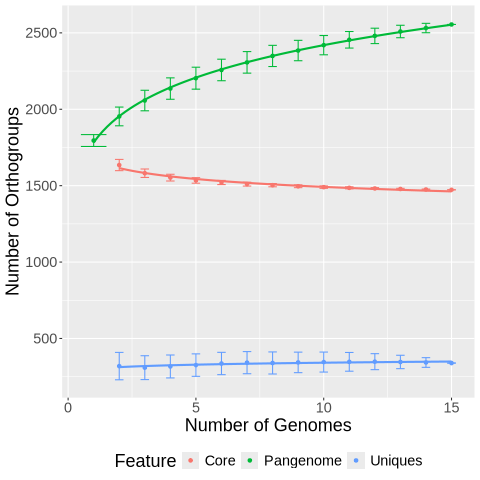

In [30]:
%%R
library("ggplot2")

#### Loading our matrix
kappa <- read.table(file = "pangenome_curve_stats_Data.tsv", sep = "\t",
                         stringsAsFactors = F, header = T)

##### The plot
p <- ggplot(data=kappa, (aes(x=genomes, y=mean)), show.legend = F) + geom_point(aes(colour = factor(group)),  show.legend = T) +
  geom_smooth(se = FALSE, method = "gam", formula = y ~ (log(x)), aes(colour=group), size = 1, show.legend =
              F, method.args = list(family = gaussian(link = "log")),) +
  geom_errorbar((aes(ymin=mean-sd, ymax=mean+sd, colour = factor(group))), width=1, position=position_dodge(0.00), show.legend = F) +
  theme(legend.position="bottom", text = element_text(size = 18)) +
  scale_color_discrete(labels = c("Core", "Pangenome", "Uniques")) +
  labs(y= "Number of Orthogroups", x = "Number of Genomes", colour = "Feature")


##### Showing image
p

####

This is inspired in the following figure from [Tettelin et al., 2008](https://www.sciencedirect.com/science/article/abs/pii/S1369527408001239?via%3Dihub):

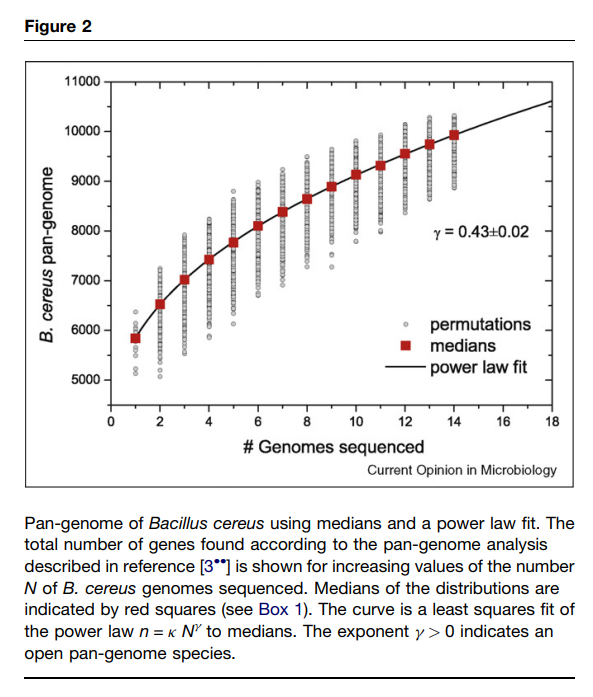

Loaded pangenome data:
    genomes         mean         sd group
0         1  1795.470470  38.786695   pan
1         2  1953.053053  61.225316   pan
2         3  2057.246246  67.330396   pan
3         4  2135.637638  70.081965   pan
4         5  2203.514515  71.927524   pan
5         6  2257.198198  70.346742   pan
6         7  2306.902903  70.568729   pan
7         8  2349.193193  69.340117   pan
8         9  2384.367367  66.658930   pan
9        10  2419.643644  63.164663   pan
10       11  2454.724725  53.989434   pan
11       12  2480.057057  50.397694   pan
12       13  2508.975976  40.682152   pan
13       14  2531.846847  30.761341   pan
14       15  2555.000000   0.000000   pan
y = 1783.00600 * n ^ 0.13261


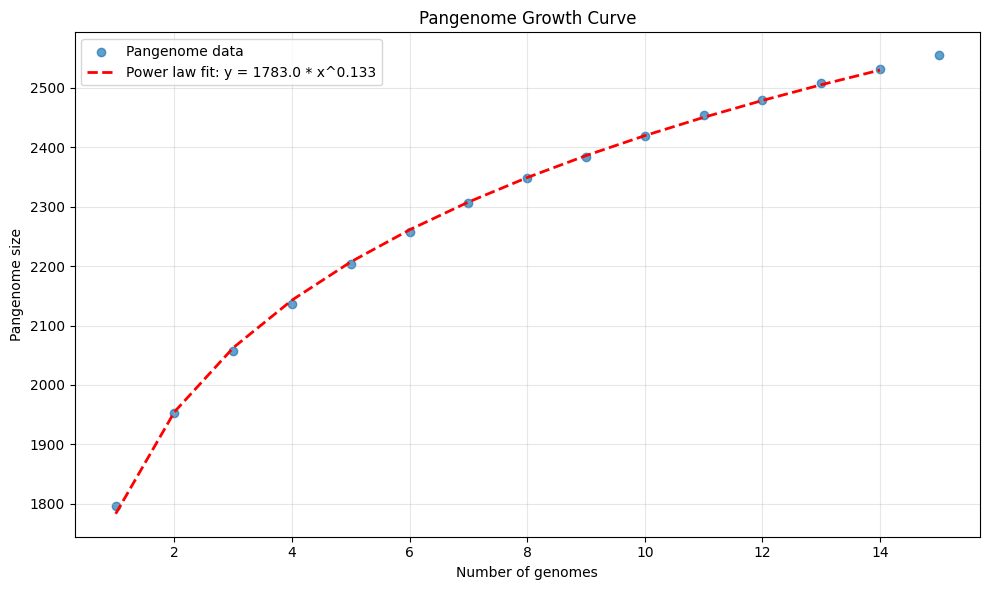

In [42]:
### Python code for pangenome analysis
### Let's calculate GAMMA!

import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import warnings

# Suppress specific RuntimeWarnings for overflow
warnings.filterwarnings('ignore', category=RuntimeWarning, message='overflow encountered in power')

def objective(x, a, b):
    """
    Power law function: y = a * x^b
    With overflow protection and numerical stability improvements
    """
    # Convert to float64 (more stable than float128)
    x = np.asarray(x, dtype=np.float64)

    # Clip b to reasonable range to prevent overflow
    b = np.clip(b, -5, 5)

    # Use np.power with error state control
    with np.errstate(over='ignore', invalid='ignore'):
        result = a * np.power(x, b)
        # Replace any inf or nan values with reasonable estimates
        result = np.where(np.isfinite(result), result, a * x)

    return result

def safe_curve_fit(func, x, y, initial_guess=None, max_attempts=3):
    """
    Wrapper for curve_fit with multiple attempts and better error handling
    """
    attempts = [
        initial_guess,  # User-provided guess
        [1.0, 0.5],     # Conservative guess
        [np.mean(y), 0.1]  # Very conservative guess
    ]

    for i, guess in enumerate(attempts[:max_attempts]):
        if guess is None and i == 0:
            continue

        try:
            popt, pcov = curve_fit(
                func, x, y,
                p0=guess,
                maxfev=5000,  # Increase max iterations
                method='lm'   # Use Levenberg-Marquardt algorithm
            )
            return popt, pcov
        except (RuntimeError, ValueError, OverflowError) as e:
            print(f"Curve fit attempt {i+1} failed: {e}")
            if i == max_attempts - 1:
                # If all attempts fail, return simple linear approximation
                print("Using linear approximation as fallback")
                slope = (y[-1] - y[0]) / (x[-1] - x[0]) if len(x) > 1 else 1
                intercept = y[0] - slope * x[0] if len(x) > 0 else 0
                return [intercept, slope], None

    return None, None

# Load the dataset
try:
    url = "/content/pangenome_curve_stats_Data.tsv"
    dataframe = read_csv(url, sep="\t")

    # Subsetting only to pangenome data
    pan_dataframe = dataframe[dataframe["group"] == "pan"]
    print("Loaded pangenome data:")
    print(pan_dataframe)
    data = pan_dataframe.values

    # Choose the input and output variables
    x, y = data[:, 0], data[:, 1]

    # Convert to float64 (not float128) for better stability
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    # Perform safe curve fitting
    popt, pcov = safe_curve_fit(objective, x, y)

    if popt is not None:
        a, b = popt
        print('y = %.5f * n ^ %.5f' % (a, b))

        # Plot input vs output
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, alpha=0.7, label='Pangenome data')

        # Define a sequence of inputs between the smallest and largest known inputs
        x_line = arange(min(x), max(x), 1)

        # Calculate the output for the range using our safe function
        y_line = objective(x_line, a, b)

        # Create a line plot for the mapping function
        plt.plot(x_line, y_line, '--', color='red', linewidth=2,
                label=f'Power law fit: y = {a:.1f} * x^{b:.3f}')
        plt.xlabel('Number of genomes')
        plt.ylabel('Pangenome size')
        plt.title('Pangenome Growth Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Curve fitting failed - check your data")

except FileNotFoundError:
    print("Data file not found. Please check the file path.")
    print("Creating sample data for demonstration...")

    # Create sample data for testing
    np.random.seed(42)
    x = np.arange(1, 21, dtype=np.float64)
    y = 1000 * np.power(x, 0.3) + np.random.normal(0, 50, len(x))

    # Fit the sample data
    popt, pcov = safe_curve_fit(objective, x, y)

    if popt is not None:
        a, b = popt
        print('Sample data fit: y = %.5f * n ^ %.5f' % (a, b))

        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, alpha=0.7, label='Sample data')
        x_line = np.linspace(min(x), max(x), 100)
        y_line = objective(x_line, a, b)
        plt.plot(x_line, y_line, '--', color='red', linewidth=2,
                label=f'Power law fit: y = {a:.1f} * x^{b:.3f}')
        plt.xlabel('Number of genomes')
        plt.ylabel('Pangenome size')
        plt.title('Pangenome Growth Curve (Sample Data)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


-----

## **Orthogroup Heatmap**


```
Let's return to the orthogroup matrix. We will create a heatmap.
```

In [11]:
%%R

data  <- read.table("new_Orthogroup_matrix.Binnary.tsv",
                    header = T,
                    sep = "\t",
                    comment.char = "",
                    check.names = F)

##### backup (just in case)
olddata <- data

##### Optional: change the "-" character for a dot (if the names contain any "-")
#colnames(data) <- gsub('-', '.', colnames(data))

##### rownames will be assigned to the cluster name (for example, the first column is called '###TAXON')
rownames(data) <- data[,1]

##### remove the first column
data <- data[,-1]

##### Optional: if you don't need a colum
##### this is for remove it (`uselessCol` is your target column)
#data$uselessCol <- NULL

#### Replace NaN by plain zeros
data[is.na(data)] <- 0

##### Transpose table (Genomes will have to be the rows)
#tdata <- t(data)
#tdata <- as.data.frame(tdata)

##### Optional: Now, we can convert our dataset into a binary matrix (0 / 1)
#binary_tdata <- as.matrix((tdata > 0) + 0) ### making binary
#binary_tdata <- as.data.frame(binary_tdata)
#binary_data  <- t(binary_tdata)

binary_data <- as.matrix((data > 0) + 0) ### making binary
binary_data2 <- as.data.frame(binary_data)

##### remove all columns with 1 in all cells
#binary_data2 <- binary_data[rowSums(binary_data == 1) != ncol(binary_data), ]

##### Filter by pattern as GH
#library(dplyr)
#binary_data21 <- binary_data2 %>% filter(grepl("GH", rownames(binary_data2)))

#binary_data2

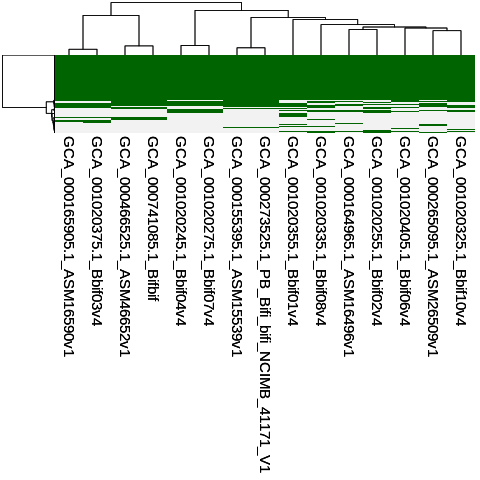

In [28]:
%%R

##################################################################################################
##################################################################################################
##### HEATMAP!!!
##################################################################################################
##################################################################################################

d2 <- binary_data2

library(pheatmap)
library(tidyr)

ph1 <- pheatmap(d2,
                cluster_rows = T, cluster_cols = T, # set to FALSE if you want to remove the dendograms
                clustering_distance_cols = 'euclidean',
                clustering_distance_rows = 'euclidean',
                clustering_method = 'ward.D',
                show_colnames = T, show_rownames = F,
                legend = F,
                annotation_names_row = F,
                annotation_names_col = F,
                #annotation_col = annotation2,
                #annotation_row = annotation3,
                #annotation_colors = ann_colors,
                fontsize = 15,
                color = c("grey95", "darkgreen"),
                scale = "none",
                height = 100
                )

ph1



```
IMPORTANT: this image looks... odd. We will use another approach.
```

In [33]:
### THIS CODE is only for Colab compatibility

import rpy2.robjects as ro
from rpy2.robjects.packages import importr

grdevices = importr('grDevices')

# Open a PNG device
grdevices.png('/content/pangenome_simple.png', width=500, height=1000)

# Execute R plotting code
ro.r('''
data  <- read.table("new_Orthogroup_matrix.Binnary.tsv",
                    header = T,
                    sep = "\t",
                    comment.char = "",
                    check.names = F)

##### rownames will be assigned to the cluster name (for example, the first column is called '###TAXON')
rownames(data) <- data[,1]

##### remove the first column
data <- data[,-1]

#### Replace NaN by plain zeros
data[is.na(data)] <- 0

binary_data <- as.matrix((data > 0) + 0) ### making binary
binary_data2 <- as.data.frame(binary_data)

d2 <- binary_data2

library(pheatmap)
library(tidyr)

ph1 <- pheatmap(d2,
                cluster_rows = T, cluster_cols = T, # set to FALSE if you want to remove the dendograms
                clustering_distance_cols = 'euclidean',
                clustering_distance_rows = 'euclidean',
                clustering_method = 'ward.D',
                show_colnames = T, show_rownames = F,
                legend = F,
                annotation_names_row = F,
                annotation_names_col = F,
                #annotation_col = annotation2,
                #annotation_row = annotation3,
                #annotation_colors = ann_colors,
                fontsize = 15,
                color = c("grey95", "darkgreen"),
                scale = "none",
                )

ph1



''')

# Close the device to save the image
grdevices.dev_off()

3


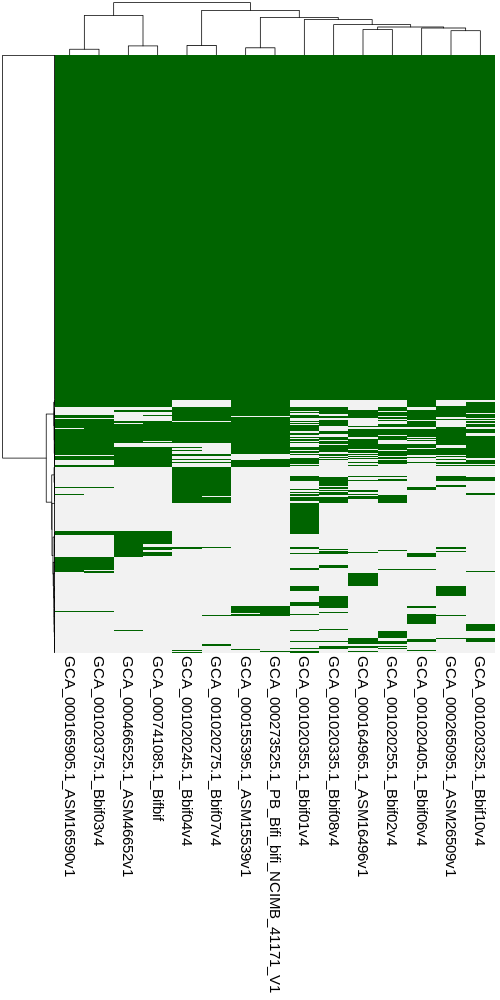

In [36]:
#### Display!
from IPython.display import Image
Image('/content/pangenome_simple.png')

```
IMPORTANT: Now... what happens if we now include metadata and make more adjustments?
```

In [22]:
#### Download the metadata file
!wget https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/mini_metadata.tsv

--2025-09-04 06:07:57--  https://raw.githubusercontent.com/jpca21/pangenome_2025_scripts/refs/heads/main/mini_metadata.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 964 [text/plain]
Saving to: ‘mini_metadata.tsv’

mini_metadata.tsv   100%[===================>]     964  --.-KB/s    in 0s      

2025-09-04 06:07:57 (47.6 MB/s) - ‘mini_metadata.tsv’ saved [964/964]



In [39]:
import csv

### Bash code to isolate colnames in a file
!head -n1 new_Orthogroup_matrix.Binnary.tsv > colnames.txt

### A python code to reclean the colunm names
# The original file to read from
input_file = 'colnames.txt'
# The new file to write the cleaned names to
output_file = 'clean_colnames.txt'

def clean_value(text):
    """
    Removes the substring after the first period from a string.
    If no period is found, the original string is returned.
    """
    # split('.', 1) splits the string at the first occurrence of '.'
    # and accesses the part before the period
    return text.split('.', 1)[0]

# Open the input and output files
with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
     open(output_file, mode='w', newline='', encoding='utf-8') as outfile:

    # Create reader and writer objects, specifying the tab delimiter
    reader = csv.reader(infile, delimiter='\t')
    writer = csv.writer(outfile, delimiter='\t')

    # Process header
    try:
        header = next(reader)
        cleaned_header = [clean_value(col) for col in header]
        writer.writerow(cleaned_header)
    except StopIteration:
        # Handle the case of an empty input file
        print("Input file is empty.")
        exit()

    # Process data rows
    for row in reader:
        # Use a list comprehension to process each cell in the row
        cleaned_row = [clean_value(cell) for cell in row]
        writer.writerow(cleaned_row)

#### Bash test
#!cat clean_colnames.txt

!cat clean_colnames.txt > new_Orthogroup_matrix.Bin2.tsv
!cat new_Orthogroup_matrix.Binnary.tsv | tail -n+2 >> new_Orthogroup_matrix.Bin2.tsv

In [37]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

grdevices = importr('grDevices')

# Open a PNG device
grdevices.png('/content/pangenome_with_meta.png', width=500, height=1000)

# Execute R plotting code
ro.r('''
data  <- read.table("new_Orthogroup_matrix.Bin2.tsv",
                    header = TRUE,
                    sep = "\t",
                    comment.char = "",
                    check.names = FALSE)

# Assign first column as rownames and remove it
rownames(data) <- data[,1]
data <- data[,-1]

# Replace NaN/NA by zeros
data[is.na(data)] <- 0

# Make binary
binary_data <- as.matrix((data > 0) + 0)
binary_data2 <- as.data.frame(binary_data)

# METADATA
metadata4 <- read.table("mini_metadata.tsv", header=TRUE, sep="\t", quote="", encoding="UTF-8")
metadata4 <- as.data.frame(metadata4)

# Country metadata
metaAX <- data.frame(Country = metadata4$COUNTRY, row.names = metadata4$NAME, stringsAsFactors = FALSE)
metaAX$Country[is.na(metaAX$Country)] <- "Not_defined"
metaAX$Country <- gsub(" ", "_", metaAX$Country)

# Source metadata
metaAD <- data.frame(Source = metadata4$SOURCE, row.names = metadata4$NAME, stringsAsFactors = FALSE)
metaAD$Source[is.na(metaAD$Source)] <- "Not_defined"
metaAD$Source <- gsub(" ", "_", metaAD$Source)

# Combine
annotation2 <- data.frame(Country = metaAX$Country,
                          Source = metaAD$Source,
                          row.names = colnames(binary_data2),
                          stringsAsFactors = FALSE)

# Color palette
library(RColorBrewer)
mycolors_A <- colorRampPalette(brewer.pal(11, "Spectral"))(15)
ann_colors = list(
  Country = c(Not_defined = "grey90",
              Germany = "magenta",
              Italy = "#F57647",
              Poland = "#FBA45C",
              South_Korea = "#FFFFBF",
              Spain = "cyan",
              United_Kingdom = "#48A0B2"
  ),
  Source = c("Adult_stool_sample" = "red",
             "infant_stool_sample" = "blue"
  )
)

# Heatmap
library(pheatmap)
ph2 <- pheatmap(binary_data2,
                cluster_rows = FALSE, cluster_cols = TRUE,
                clustering_distance_cols = 'euclidean',
                clustering_distance_rows = 'euclidean',
                clustering_method = 'ward.D',
                show_colnames = TRUE, show_rownames = FALSE,
                legend = FALSE,
                annotation_names_row = FALSE,
                annotation_names_col = FALSE,
                annotation_col = annotation2,
                annotation_colors = ann_colors,
                fontsize = 15,
                color = c("grey95", "darkgreen"),
                scale = "none"
)
''')

# Close the device to save the image
grdevices.dev_off()


3


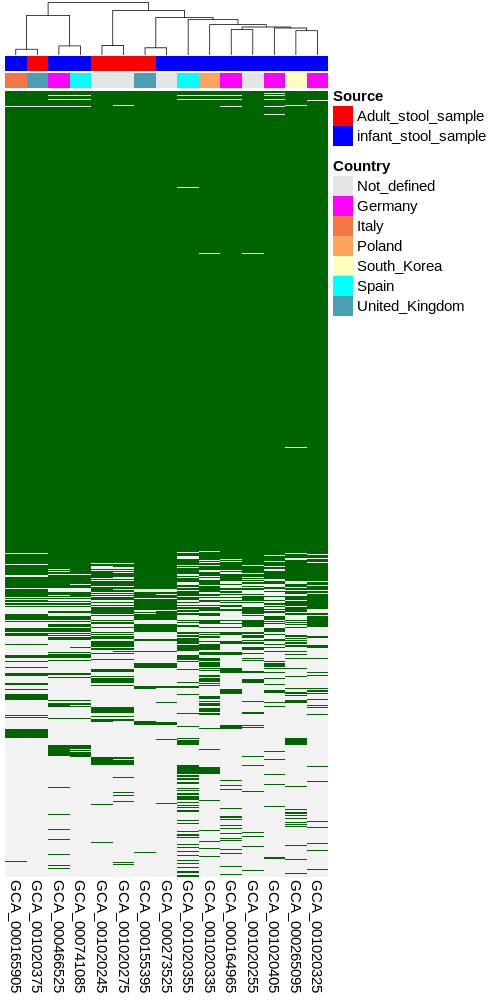

In [38]:
#### Display!
from IPython.display import Image
Image('/content/pangenome_with_meta.png')


-----

## **Final statistics**



In [47]:
#### Name this script as `script1.py`

import os
import glob
import pandas as pd
import numpy as np

#Load file.
df=pd.read_csv("new_Orthogroup_matrix.Binnary.tsv", sep="\t", header=[0])

#make the first column row name.
df.index=df.iloc[:,0]
df.index.name=None

#Remove col used for rownames.
df.drop("Orthogroup" , axis=1, inplace=True)

ncolumns=len(df.columns)
nrows=len(df.index)
rows=df.index
columns=df.columns

df['Type']=None  # o df['Type']=''
df['Gene_count']=np.nan
df['Perc_Prevalence']=np.nan

counter=0

ninety_four_percent=(ncolumns*94)/100
fifteen_percent=(ncolumns*15)/100
ninetyfive_percent=(ncolumns*95)/100

for r in rows:
    for c in columns:
        cell=df.at[r,c]
        if(cell==0):
            counter=counter+1
    genes=ncolumns-counter
    if(genes >= ninetyfive_percent):
        df.at[r,'Type']='Core'
        df.at[r,'Gene_count']=genes
        df.at[r,'Perc_Prevalence']=(genes/ncolumns) * 100
    if(genes < ninetyfive_percent and genes >= fifteen_percent):
        df.at[r,'Type']='Shell'
        df.at[r,'Gene_count']=genes
        df.at[r,'Perc_Prevalence']=(genes/ncolumns) * 100
    if(genes < fifteen_percent and genes >=2 ):
        df.at[r,'Type']='Cloud'
        df.at[r,'Gene_count']=genes
        df.at[r,'Perc_Prevalence']=(genes/ncolumns) * 100
    if(genes==1):
        df.at[r,'Type']='Unique'
        df.at[r,'Gene_count']=genes
        df.at[r,'Perc_Prevalence']=(genes/ncolumns) * 100
    genes=0
    counter=0


#print(df)
new_df=df[['Type']].copy()
new_df[['Gene_count']] = df[['Gene_count']]
new_df[['Perc_Prevalence']] = df[['Perc_Prevalence']]


#new_df.to_csv("labels.tsv",sep="\t",index=True,header=True)

In [48]:
#### Show the pandas dataset
new_df

,Type,Gene_count,Perc_Prevalence
OG0000000,Core,15.0,100.000000
OG0000001,Core,15.0,100.000000
OG0000002,Shell,14.0,93.333333
OG0000003,Core,15.0,100.000000
OG0000004,Core,15.0,100.000000
...,...,...,...
OG0002550,Unique,1.0,6.666667
OG0002551,Unique,1.0,6.666667
OG0002552,Unique,1.0,6.666667
OG0002553,Unique,1.0,6.666667


In [49]:
# Count the number of rows for each type
core_count = new_df[new_df['Type'] == 'Core'].shape[0]
shell_count = new_df[new_df['Type'] == 'Shell'].shape[0]
cloud_count = new_df[new_df['Type'] == 'Cloud'].shape[0]
unique_count = new_df[new_df['Type'] == 'Unique'].shape[0]

# Print the counts
print(f"Number of Core orthogroups: {core_count}")
print(f"Number of Shell orthogroups: {shell_count}")
print(f"Number of Cloud orthogroups: {cloud_count}")
print(f"Number of Unique orthogroups: {unique_count}")

Number of Core orthogroups: 1473
Number of Shell orthogroups: 547
Number of Cloud orthogroups: 196
Number of Unique orthogroups: 339
